In [23]:
import pandas as pd
import numpy as np
import networkx as nx

In [2]:
fib_dir = "../data/external/FibVID-main/"

In [3]:
claim_propagation = pd.read_csv(fib_dir + "claim_propagation/claim_propagation.csv")
origin_tweet = pd.read_csv(fib_dir + "claim_propagation/origin_tweet.csv")
news_claim = pd.read_csv(fib_dir + "news_claim/news_claim.csv")
user_information = pd.read_csv(fib_dir + "user_information/user_information.csv")

In [9]:
user_information

,following_count,follower_count,creation_date,description,user_id
0,101.0,56.0,2020-03-26 15:57:20,NaN,0
1,8104.0,22533.0,2015-07-21 22:10:47,"People say I’m skeptical, but I don’t believe ...",1
2,598.0,372.0,2019-02-02 19:01:35,Motorcycles. Retired merchant Mariner Captain...,2
3,322.0,203.0,2020-04-01 07:32:57,"Cheese, wine, medieval history, licensed foren...",3
4,102.0,4.0,2020-11-07 13:23:04,NaN,4
...,...,...,...,...,...
144736,4674.0,3338.0,2019-12-06 23:54:47,🧢 #YangGangForever\n #YangIt☯️\n.\n.\n(backing...,144736
144737,91.0,405.0,2010-06-23 02:49:46,Overly Blunt Podcast and CHRISPIRACY.,144737
144738,7416.0,6753.0,2017-05-30 16:34:29,Retired RN ~ Mom enjoying family & the #Saltli...,144738
144739,284.0,18765.0,2012-04-16 22:32:36,🇰🇼كل ما أكتب من وحي قلمي على صفحات أيامي المؤق...,144739


In [56]:
news_claim

,text,source,claim_num,group
0,the (covid 19) cases are going up but it's bec...,politifact,0,1
1,every election year has a disease sars in 200...,politifact,1,1
2,obama ordered cia to train isis jihadists,politifact,2,3
3,"says george soros said, im going to bring down...",politifact,3,3
4,if you paid rent in march or april they got to...,politifact,4,1
...,...,...,...,...
1348,says a photo shows patrick mahomes wearing a s...,politifact,1348,3
1349,nancy pelosi may have just committed a violati...,politifact,1349,3
1350,"says donald trump tweeted, i have it on good a...",politifact,1350,3
1351,says eight iowa counties have more adults regi...,politifact,1351,3


In [10]:
news_claim.group.value_counts()

1    569
3    431
0    203
2    150
Name: group, dtype: int64

In [46]:
origin_tweet

,create_date,tweet_id,similarity,like_count,retweet_count,post_text,claim_number,group,hashtag,tweet_user
0,2020-07-28T14:04:36.000Z,1288113129889517578,0.000000,2823,1050,The latest round of testing from the Miami Mar...,0,1,NaN,85952
1,2020-07-28T03:36:37.000Z,1287955090184105984,0.000000,54,100,Scammers are cold calling Victorians claiming ...,0,1,COVID,5342
2,2020-07-27T21:05:06.000Z,1287856562200088581,0.000000,822,428,"“It feels like we’re alone,” Hialeah, FL, Mayo...",0,1,NaN,78787
3,2020-07-27T14:54:11.000Z,1287763218933395461,0.000000,36687,14982,The best laid plans of a multi-billion dollar ...,0,1,NaN,80798
4,2020-04-02T14:37:32.000Z,1245722037869477896,0.404285,13276,4154,NYC’s case fatality rate for Covid19 is now al...,57,1,NaN,80798
...,...,...,...,...,...,...,...,...,...,...
1769,2020-12-10T06:10:04.000Z,1336916069336948736,0.445844,2328,345,Struggling after speaking with ⁦@donlemon⁩ ton...,298,1,COVID19,61051
1770,2020-12-04T15:10:13.000Z,1334877674540572672,0.328623,11593,2454,As the dust settles on Democrats' downballot f...,298,1,NaN,42186
1771,2020-12-05T11:19:16.000Z,1335181945635004417,0.659882,1436,180,We broke the news on #OutLoudWithGiannoCaldwel...,298,1,OutLoudWithGiannoCaldwell,73973
1772,2020-12-20T20:31:55.000Z,1340756841454850049,0.390273,171932,2654,I see your tweets and I’m trying to double and...,298,1,NaN,75482


In [38]:
claim_propagation.claim_number.value_counts().index[-100]

160

In [39]:
dfs = {i:claim_propagation.loc[claim_propagation.claim_number == i] for i in claim_propagation.claim_number.unique()}

In [42]:
test_df = dfs[160]

In [43]:
edges = list(zip(test_df.parent_id, test_df.tweet_id))
g = nx.DiGraph()
g.add_edges_from(edges)

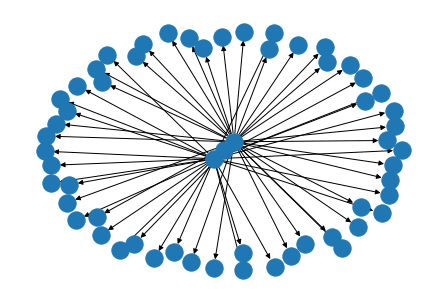

In [44]:
nx.draw(g)

In [47]:
origin_tweet.loc[origin_tweet.claim_number == 160]

,create_date,tweet_id,similarity,like_count,retweet_count,post_text,claim_number,group,hashtag,tweet_user
410,2020-06-02T12:13:00.000Z,1267791321965539328,0.843884,442,199,Candace Owens accused George Soros and the Ope...,160,3,NaN,78827
411,2020-06-01T18:16:36.000Z,1267520438827020288,0.785079,225,137,.@RealCandaceO claimed that George Soros and h...,160,3,NaN,78827


In [55]:
news_claim.loc[news_claim.claim_num == 160].text[160]

'says george soros is funding the chaos in minneapolis via his open society foundations.'